In [1]:
%load_ext autoreload
%autoreload 2

import DataSets
from DataSets import *
import DataGeneration
from DataGeneration import *

import pandas as pd
import numpy as np
import matplotlib.patches as patches
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree
#np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



In [2]:
seed = 2021
np.random.seed(seed)

In [3]:
x, y, attributes, classes, full = IrisDataSet()
#x, y, attributes, classes, full = DiabetesDataSetQuant()
#x, y, attributes, classes, full = DiabetesDataSetAbsolut()
#x, y, attributes, classes, full = BostonHPDataSetQuant()
#x, y, attributes, classes, full = BostonHPDataSetAbsolut()
#x, y, attributes, classes, full = CaliforniaDataSetQuant()
#x, y, attributes, classes, full = CaliforniaDataSetAbsolut()
#x, y, attributes, classes, full = CaliforniaHLDataSetQuant()
#x, y, attributes, classes, full = CaliforniaHLDataSetAbsolut()
#x, y, attributes, classes, full = OccupancyDataSet()

In [4]:
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.2, random_state=seed)
x_valid, x_test, y_valid, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=seed)

(120, 4)
(15, 4)
(15, 4)


(array([6., 0., 0., 0., 0., 7., 0., 0., 0., 2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

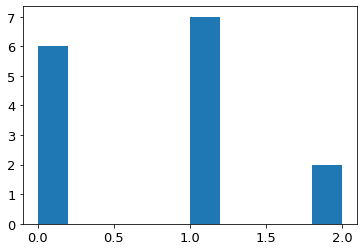

In [5]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
plt.hist(y_test)

In [6]:
def yVectorTOcVector(yVector, Colors):
    yVectorLength = yVector.shape[0]
    #ycVector = np.zeros(yVectorLength)
    ycVector = [None] * yVectorLength
    for i in range(yVectorLength):
        ycVector[i] = Colors[yVector[i]]
        
    return ycVector

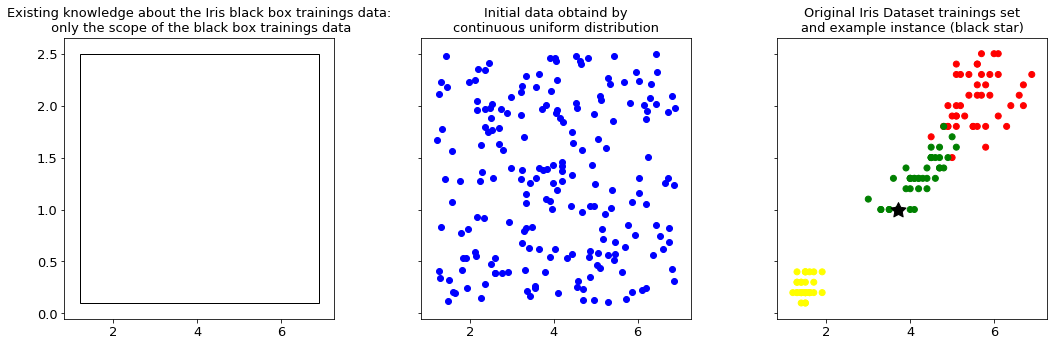

In [7]:
x_Sample = x_train[0]
MinMax_x_train = MinMax_2d(x_train)
x_RandomUniform = RandomFromMinMaxUniform(MinMax_x_train, 200, seed)
ractanglepoint = [MinMax_x_train[0,2],MinMax_x_train[0,3]]
rectanglehight =  MinMax_x_train[1,2] - MinMax_x_train[0,2]
rectanglewidth =  MinMax_x_train[1,3] - MinMax_x_train[0,3]

colors = ["yellow","green","red"]

fig, ax = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(15, 5))


ax[0].add_patch(patches.Rectangle(ractanglepoint,rectanglehight,rectanglewidth, edgecolor = 'black',fill = False))
ax[1].scatter(x_RandomUniform[:,2],x_RandomUniform[:,3], c = "blue")
ax[2].scatter(x_train[:,2],x_train[:,3], c = yVectorTOcVector(y_train,colors))
ax[2].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))

ax[0].set_title("Existing knowledge about the Iris black box trainings data:\n only the scope of the black box trainings data")
ax[1].set_title("Initial data obtaind by\ncontinuous uniform distribution")
ax[2].set_title("Original Iris Dataset trainings set\nand example instance (black star)")

fig.tight_layout()
plt.show()

fig.savefig("continous uniform distribution.pdf")

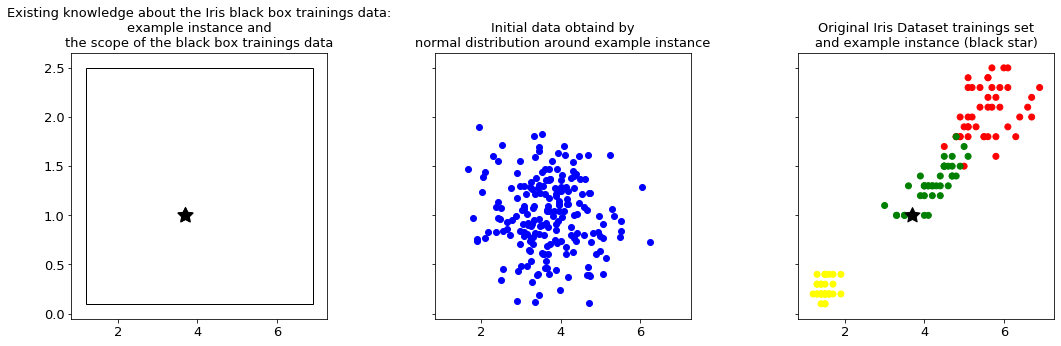

In [8]:
x_Sample = x_train[0]
x_RandomNormalSample = RandomAroundSampleNormal(x_Sample,MinMax_2d(x_train),200,seed, 0.15)

colors = ["yellow","green","red"]

fig, ax = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(15, 5))


ax[0].add_patch(patches.Rectangle(ractanglepoint,rectanglehight,rectanglewidth, edgecolor = 'black',fill = False))
ax[0].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))
ax[1].scatter(x_RandomNormalSample[:,2],x_RandomNormalSample[:,3], c = "blue")
ax[0].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))
ax[2].scatter(x_train[:,2],x_train[:,3], c = yVectorTOcVector(y_train,colors))
ax[2].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))

ax[0].set_title("Existing knowledge about the Iris black box trainings data:\nexample instance and\nthe scope of the black box trainings data")
ax[1].set_title("Initial data obtaind by\nnormal distribution around example instance")
ax[2].set_title("Original Iris Dataset trainings set\nand example instance (black star)")

fig.tight_layout()
plt.show()

fig.savefig("normal distribution.pdf")

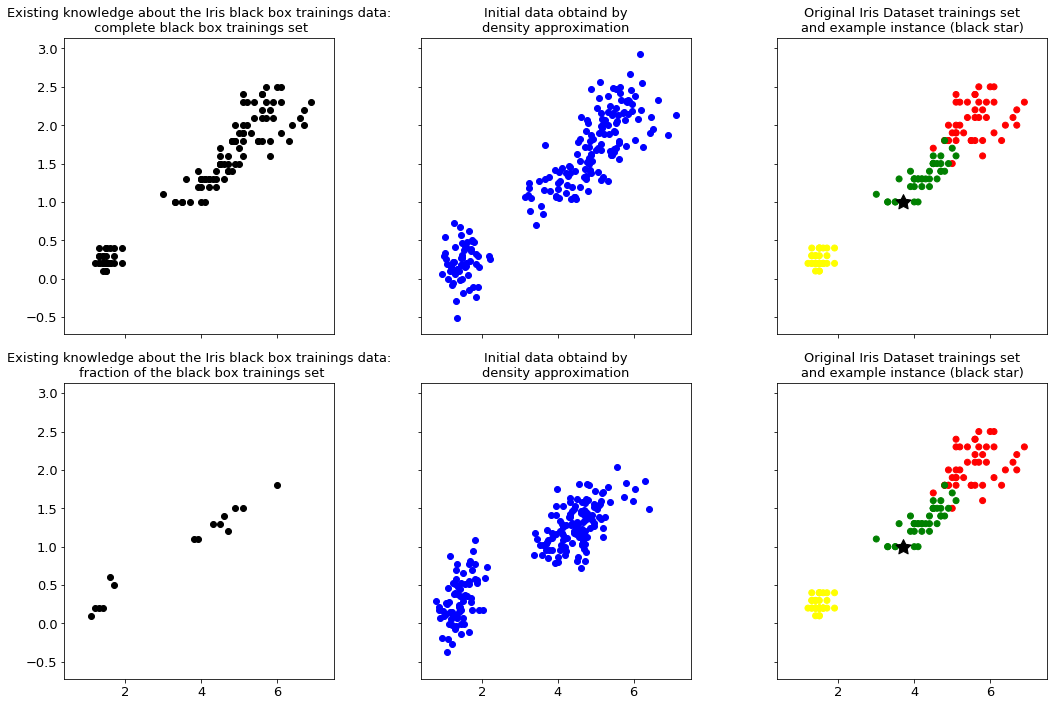

In [9]:
x_SynthDistAll = DensityApproximation(x_train, 200, seed)
x_SynthDistFraction = DensityApproximation(x_test, 200, seed)

colors = ["yellow","green","red"]

fig, ax = plt.subplots(2, 3,sharex=True, sharey=True, figsize=(15, 10))

ax[0,0].scatter(x_train[:,2],x_train[:,3], c = "black")
ax[0,1].scatter(x_SynthDistAll[:,2],x_SynthDistAll[:,3], c = "blue")
ax[0,2].scatter(x_train[:,2],x_train[:,3], c = yVectorTOcVector(y_train,colors))
ax[0,2].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))

ax[0,0].set_title("Existing knowledge about the Iris black box trainings data:\n complete black box trainings set")
ax[0,1].set_title("Initial data obtaind by\ndensity approximation")
ax[0,2].set_title("Original Iris Dataset trainings set\nand example instance (black star)")

ax[1,0].scatter(x_test[:,2],x_test[:,3], c = "black")
ax[1,1].scatter(x_SynthDistFraction[:,2],x_SynthDistFraction[:,3], c = "blue")
ax[1,2].scatter(x_train[:,2],x_train[:,3], c = yVectorTOcVector(y_train,colors))
ax[1,2].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))

ax[1,0].set_title("Existing knowledge about the Iris black box trainings data:\n fraction of the black box trainings set")
ax[1,1].set_title("Initial data obtaind by\ndensity approximation")
ax[1,2].set_title("Original Iris Dataset trainings set\nand example instance (black star)")

fig.tight_layout()
plt.show()

fig.savefig("density approximation.pdf")

In [10]:
x_RandomRows = RandomRows(x_valid, 1000, seed)

In [11]:
NeuralTest = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=20000, random_state = seed, n_iter_no_change=10)

NeuralTest.fit(x_train, y_train)

print(NeuralTest.get_params(deep=True))
print("TrainScore:")
print(NeuralTest.score(x_train, y_train, sample_weight=None))
print("ValidScore:")
print(NeuralTest.score(x_valid, y_valid, sample_weight=None))
print("TestScore:")
print(NeuralTest.score(x_test, y_test, sample_weight=None))


{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 20000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 2021, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
TrainScore:
0.9833333333333333
ValidScore:
1.0
TestScore:
1.0


In [12]:
ExampleInstance = x_test[0]
target = -1
x_RandomUniformGenAlgoStart = RandomFromMinMaxUniform(MinMax_x_train, 1000, seed)
y_RandomUniformGenAlgoStart = np.atleast_2d(NeuralTest.predict(x_RandomUniformGenAlgoStart))
yff_RandomUniformGenAlgoStart = foil_classification_s(y_RandomUniformGenAlgoStart, ExampleInstance, blackbox = NeuralTest, target = target, comment_bool = True)

x_fact_Gen0 = x_RandomUniformGenAlgoStart[np.squeeze(yff_RandomUniformGenAlgoStart) == 1,...]
x_foil_Gen0 = x_RandomUniformGenAlgoStart[np.squeeze(yff_RandomUniformGenAlgoStart) == 0,...]


Sample-Class is [2]. Foil-Class is every other class


In [17]:
np.random.seed(seed)
x_GenAlgo_fact_gen_2 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 1, NeuralTest, 1000, 2, 0.2 ,0.2, target = target)
x_GenAlgo_foil_gen_2 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 0, NeuralTest, 1000, 2, 0.2 ,0.2, target = target)
np.random.seed(seed)
x_GenAlgo_fact_gen_4 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 1, NeuralTest, 1000, 4, 0.2 ,0.2, target = target)
x_GenAlgo_foil_gen_4 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 0, NeuralTest, 1000, 4, 0.2 ,0.2, target = target)
np.random.seed(seed)
x_GenAlgo_fact_gen_6 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 1, NeuralTest, 1000, 6, 0.2 ,0.2, target = target)
x_GenAlgo_foil_gen_6 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 0, NeuralTest, 1000, 6, 0.2 ,0.2, target = target)
np.random.seed(seed)
x_GenAlgo_fact_gen_8 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 1, NeuralTest, 1000, 8, 0.2 ,0.2, target = target)
x_GenAlgo_foil_gen_8 = GenAlgo(x_RandomUniform, ExampleInstance, MinMax_2d(x_train), 0, NeuralTest, 1000, 8, 0.2 ,0.2, target = target)


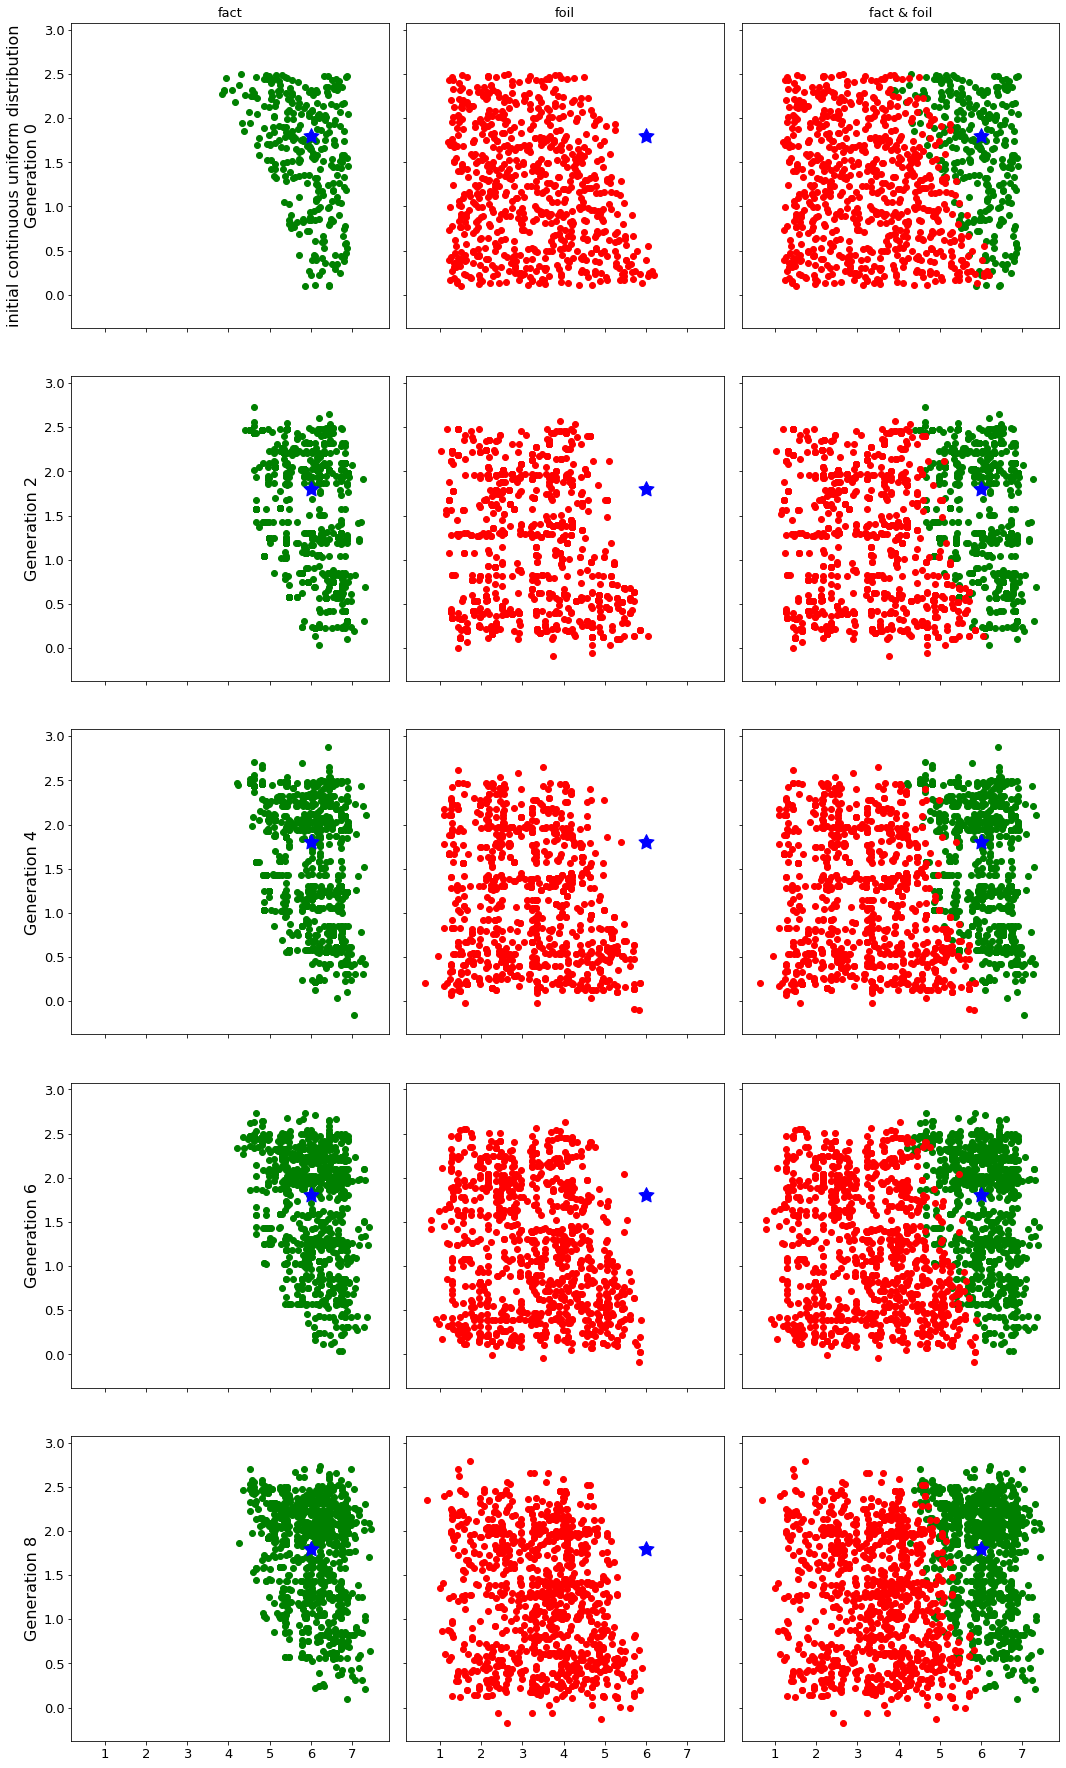

In [18]:
fig, ax = plt.subplots(5, 3,sharex=True, sharey=True, figsize=(15, 25))
#gen0
ax[0,0].scatter(x_fact_Gen0[:,2],x_fact_Gen0[:,3], c = "green")
ax[0,0].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[0,1].scatter(x_foil_Gen0[:,2],x_foil_Gen0[:,3], c = "red")
ax[0,1].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[0,2].scatter(x_fact_Gen0[:,2],x_fact_Gen0[:,3] , c = "green")
ax[0,2].scatter(x_foil_Gen0[:,2],x_foil_Gen0[:,3] , c = "red")
ax[0,2].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))
#gen2
ax[1,0].scatter(x_GenAlgo_fact_gen_2[:,2],x_GenAlgo_fact_gen_2[:,3], c = "green")
ax[1,0].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[1,1].scatter(x_GenAlgo_foil_gen_2[:,2],x_GenAlgo_foil_gen_2[:,3], c = "red")
ax[1,1].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[1,2].scatter(x_GenAlgo_fact_gen_2[:,2],x_GenAlgo_fact_gen_2[:,3] , c = "green")
ax[1,2].scatter(x_GenAlgo_foil_gen_2[:,2],x_GenAlgo_foil_gen_2[:,3] , c = "red")
ax[1,2].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))
#gen4
ax[2,0].scatter(x_GenAlgo_fact_gen_4[:,2],x_GenAlgo_fact_gen_4[:,3], c = "green")
ax[2,0].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[2,1].scatter(x_GenAlgo_foil_gen_4[:,2],x_GenAlgo_foil_gen_4[:,3], c = "red")
ax[2,1].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[2,2].scatter(x_GenAlgo_fact_gen_4[:,2],x_GenAlgo_fact_gen_4[:,3] , c = "green")
ax[2,2].scatter(x_GenAlgo_foil_gen_4[:,2],x_GenAlgo_foil_gen_4[:,3] , c = "red")
ax[2,2].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))
#gen6
ax[3,0].scatter(x_GenAlgo_fact_gen_6[:,2],x_GenAlgo_fact_gen_6[:,3], c = "green")
ax[3,0].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[3,1].scatter(x_GenAlgo_foil_gen_6[:,2],x_GenAlgo_foil_gen_6[:,3], c = "red")
ax[3,1].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[3,2].scatter(x_GenAlgo_fact_gen_6[:,2],x_GenAlgo_fact_gen_6[:,3] , c = "green")
ax[3,2].scatter(x_GenAlgo_foil_gen_6[:,2],x_GenAlgo_foil_gen_6[:,3] , c = "red")
ax[3,2].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))
#gen8
ax[4,0].scatter(x_GenAlgo_fact_gen_8[:,2],x_GenAlgo_fact_gen_8[:,3], c = "green")
ax[4,0].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[4,1].scatter(x_GenAlgo_foil_gen_8[:,2],x_GenAlgo_foil_gen_8[:,3], c = "red")
ax[4,1].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[4,2].scatter(x_GenAlgo_fact_gen_8[:,2],x_GenAlgo_fact_gen_8[:,3] , c = "green")
ax[4,2].scatter(x_GenAlgo_foil_gen_8[:,2],x_GenAlgo_foil_gen_8[:,3] , c = "red")
ax[4,2].scatter(ExampleInstance[2],ExampleInstance[3],s=250, c = "blue",marker=(5, 1))

ax[0,0].set_title("fact")
ax[0,1].set_title("foil")
ax[0,2].set_title("fact & foil")
ax[0,0].set_ylabel('initial continuous uniform distribution\nGeneration 0')
ax[1,0].set_ylabel('Generation 2')
ax[2,0].set_ylabel('Generation 4')
ax[3,0].set_ylabel('Generation 6')
ax[4,0].set_ylabel('Generation 8')

fig.tight_layout()
plt.show()

fig.savefig("GenAlgo1.pdf")

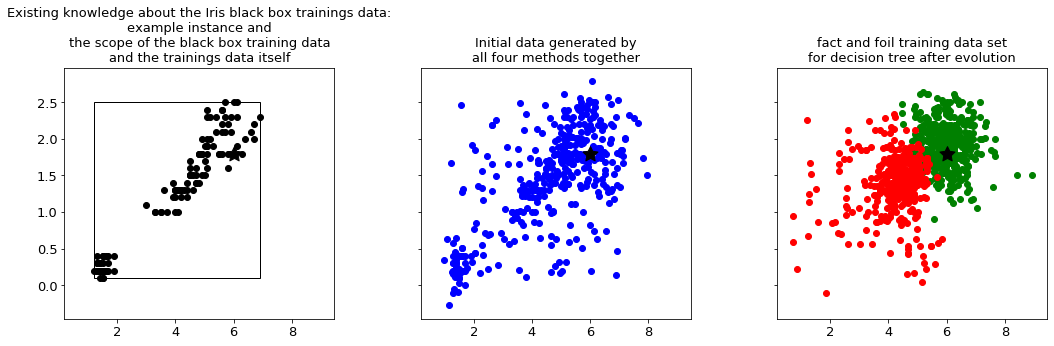

In [15]:
x_Sample = x_test[0]
np.random.seed(seed)
x_100_RandomUniform = RandomFromMinMaxUniform(MinMax_x_train, 100, seed)
x_100_RandomNormalSample = RandomAroundSampleNormal(x_Sample,MinMax_2d(x_train),100,seed, 0.15)
x_100_SynthDistAll = DensityApproximation(x_train, 100, seed)
x_100_RandomRows = RandomRows(x_train, 100, seed)

x_400 = np.vstack([x_100_RandomUniform,x_100_RandomNormalSample,x_100_SynthDistAll,x_100_RandomRows])

np.random.seed(seed)
x_GenAlgo_fact_gen_10 = GenAlgo(x_400, ExampleInstance, MinMax_2d(x_train), 1, NeuralTest, 400, 5, 0.3 ,0.5, target = target)
x_GenAlgo_foil_gen_10 = GenAlgo(x_400, ExampleInstance, MinMax_2d(x_train), 0, NeuralTest, 400, 8, 0.3 ,0.5, target = target)


colors = ["yellow","green","red"]

fig, ax = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(15, 5))


ax[0].add_patch(patches.Rectangle(ractanglepoint,rectanglehight,rectanglewidth, edgecolor = 'black',fill = False))
ax[0].scatter(x_train[:,2],x_train[:,3], c = "black")
ax[0].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))

ax[1].scatter(x_400[:,2],x_400[:,3], c = "blue")
ax[1].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))
ax[2].scatter(x_GenAlgo_fact_gen_10[:,2],x_GenAlgo_fact_gen_10[:,3] , c = "green")
ax[2].scatter(x_GenAlgo_foil_gen_10[:,2],x_GenAlgo_foil_gen_10[:,3] , c = "red")
ax[2].scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))

ax[0].set_title("Existing knowledge about the Iris black box trainings data:\nexample instance and\nthe scope of the black box training data\nand the trainings data itself")
ax[1].set_title("Initial data generated by\nall four methods together")
ax[2].set_title("fact and foil training data set\nfor decision tree after evolution")

fig.tight_layout()
plt.show()

fig.savefig("step3.pdf")

Sample-Class is [2]. Foil-Class is every other class


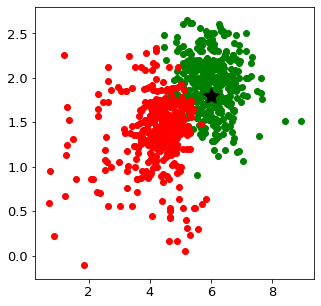

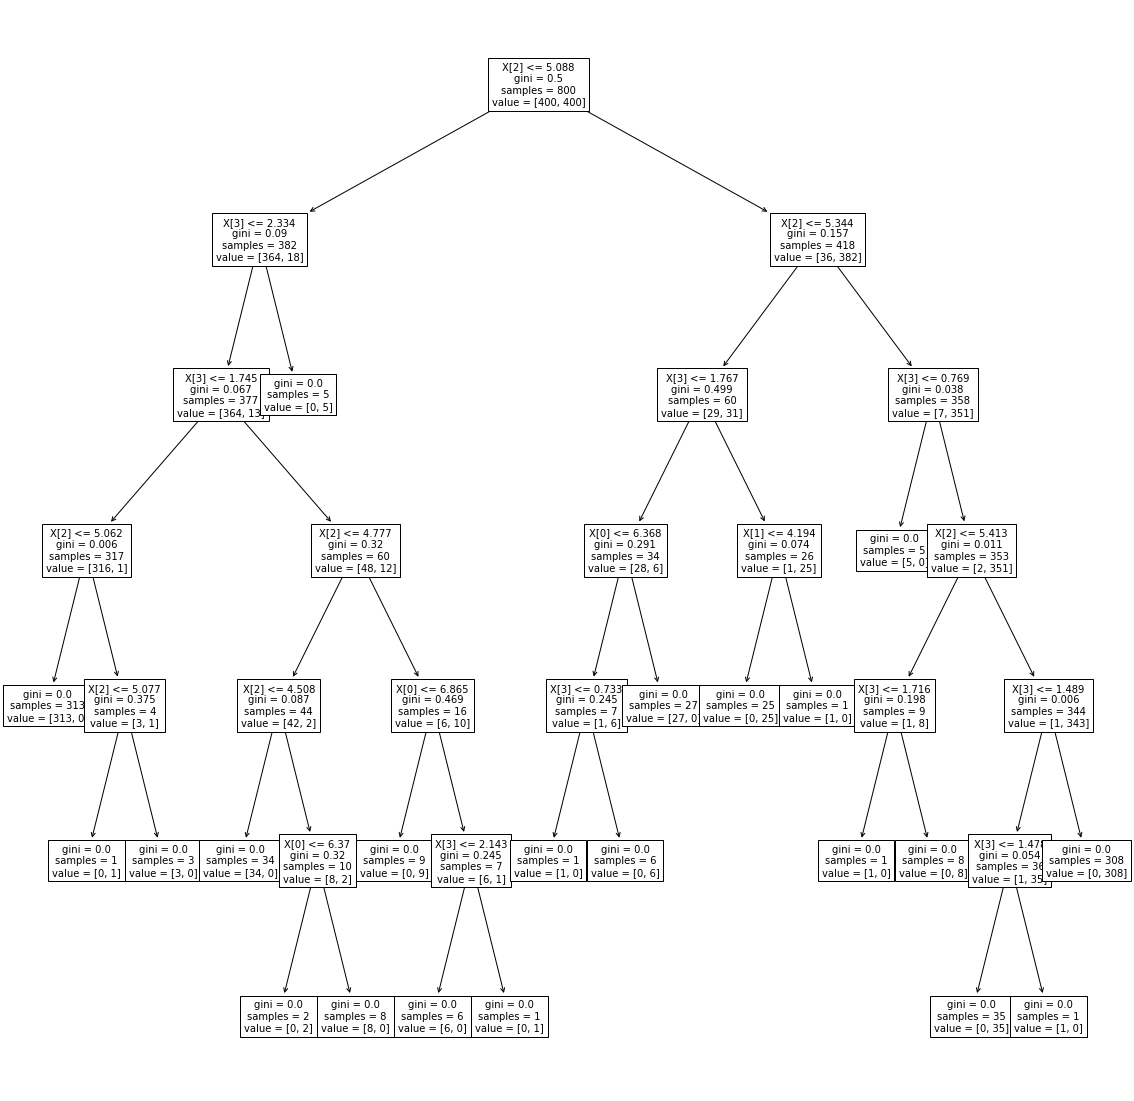

In [16]:
x_ldt_trainingset  = np.vstack([x_GenAlgo_fact_gen_10,x_GenAlgo_foil_gen_10])
y_ldt_trainingset = NeuralTest.predict(x_ldt_trainingset)
yff_ldt_trainingset = foil_classification_s(y_ldt_trainingset, x_Sample, blackbox = NeuralTest, target = target, comment_bool = True)

LocalTree = tree.DecisionTreeClassifier()
LocalTree.fit(x_ldt_trainingset, yff_ldt_trainingset)

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_GenAlgo_fact_gen_10[:,2],x_GenAlgo_fact_gen_10[:,3] , c = "green")
plt.scatter(x_GenAlgo_foil_gen_10[:,2],x_GenAlgo_foil_gen_10[:,3] , c = "red")
plt.scatter(x_Sample[2],x_Sample[3],s=250, c = "black",marker=(5, 1))
plt.show()
fig.savefig("step3l.pdf")

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(LocalTree, max_depth=12, fontsize=10)
plt.show()
fig.savefig("step3r.pdf")

